<a href="https://colab.research.google.com/github/milochanaRathnayake/MachineLearningProjects/blob/main/Project_02_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np #use to make numpy arrays
import pandas as pd #for making data frame
import matplotlib.pyplot as plt
import seaborn as sns #use to make plots and graphs
from sklearn.model_selection import train_test_split #for split original data in to train and test
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



Data Collection and Preprocessing


In [2]:
#loading the csv data to a Pandas DataFrame
df = pd.read_csv('/content/sample_data/gld_price_data.csv')

In [3]:
#print first 05 rows in the dataframe
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#print the last 05 rows of the dataframe
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and columns
df.shape

(2290, 6)

In [7]:
# getting some basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation : 


1.   Positive Correlation
2.   negative Correlation

In [10]:
correlation = df.corr()

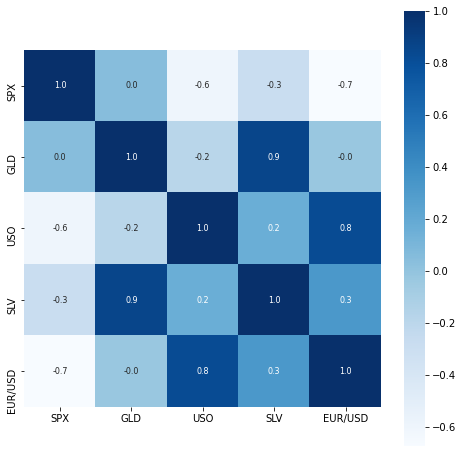

In [13]:
# construscting a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' :8}, cmap='Blues')


In [14]:
# correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


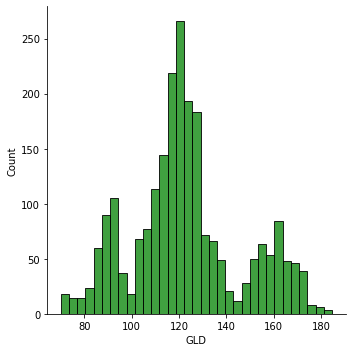

In [15]:
# check the distribution of the gold price
sns.displot(df['GLD'], color='Green')

Splitting the features and Target

In [16]:
X = df.drop(['Date','GLD'], axis=1)
Y = df['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spliiting data into Training data and Test data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

Model Training : Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
#training the model
regressor.fit(X_train,Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.65939959  81.83559994 116.18720016 127.60590124 120.7639012
 154.80919811 150.12479844 125.95009998 117.61789862 125.91400051
 116.86720076 171.40920073 141.13369904 167.91829865 115.17689995
 117.80930031 137.64090315 169.99960046 160.02440295 162.02869926
 155.10910044 125.28350003 175.77469951 157.10740298 125.25180059
  93.73109977  77.93950006 120.67970016 118.9815992  167.40319995
  88.31920079 125.27190032  91.09360086 117.73770043 120.98519926
 136.53410008 115.4101011  115.01570094 147.37879946 107.26890122
 104.02790221  87.09609784 126.59310059 117.98290002 151.52179887
 119.5372999  108.30219992 108.02009818  93.0914003  127.03659822
  74.71250058 113.59619945 121.33160006 111.33269946 118.70549876
 120.65489915 158.83940105 167.33260101 147.17989636  85.81299856
  94.41720052  86.87739896  90.33249994 118.91910093 126.40490027
 127.52500015 169.8163006  122.23969946 117.35999913  98.56300033
 168.44250141 143.29929849 132.16150267 121.30420234 121.57039933
 119.736400

In [24]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989474287883852


Compare the Actual Values and Predicted Values in  a Plot

In [25]:
Y_test = list(Y_test)

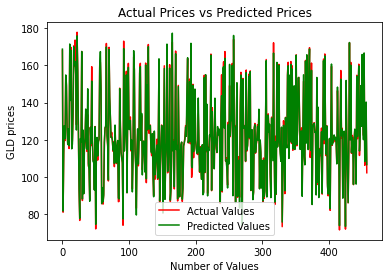

In [30]:
plt.plot(Y_test, color='red',label = "Actual Values")
plt.plot(test_data_prediction, color = 'green', label='Predicted Values')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Number of Values')
plt.ylabel('GLD prices')
plt.legend()
plt.show()